In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
#warnings
import warnings
warnings.filterwarnings('ignore')

#load dataset

In [213]:
df=pd.read_csv("/content/Horse Colic database.csv",header=None)

In [214]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2,1,530101,38.50,66,28,3,3,?,2,...,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,...,74.00,7.40,?,?,2,2,4300,0,0,2


In [215]:
# Renaming columns based on the provided mapping
column_names = [
    "surgery", "age", "hospital_number", "rectal_temperature", "pulse", "respiratory_rate",
    "extremity_temperature", "peripheral_pulse", "mucous_membranes", "capillary_refill_time",
    "pain_level", "peristalsis", "abdominal_distension", "nasogastric_tube", "nasogastric_reflux",
    "nasogastric_reflux_ph", "rectal_exam_feces", "abdomen", "packed_cell_volume", "total_protein",
    "abdominocentesis_appearance", "abdominocentesis_total_protein", "outcome", "surgical_lesion",
    "lesion_site", "lesion_type", "lesion_subtype", "cp_data"
]

In [216]:
# Renaming columns in the DataFrame
df.columns = column_names

In [217]:
df.head()

,surgery,age,hospital_number,rectal_temperature,pulse,respiratory_rate,extremity_temperature,peripheral_pulse,mucous_membranes,capillary_refill_time,...,packed_cell_volume,total_protein,abdominocentesis_appearance,abdominocentesis_total_protein,outcome,surgical_lesion,lesion_site,lesion_type,lesion_subtype,cp_data
0,2,1,530101,38.50,66,28,3,3,?,2,...,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,...,74.00,7.40,?,?,2,2,4300,0,0,2


In [218]:
#shape of dataset
df.shape

(300, 28)

#EDA(Explotary Data Analysis):-

In [219]:
#check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   surgery                         300 non-null    object
 1   age                             300 non-null    int64 
 2   hospital_number                 300 non-null    int64 
 3   rectal_temperature              300 non-null    object
 4   pulse                           300 non-null    object
 5   respiratory_rate                300 non-null    object
 6   extremity_temperature           300 non-null    object
 7   peripheral_pulse                300 non-null    object
 8   mucous_membranes                300 non-null    object
 9   capillary_refill_time           300 non-null    object
 10  pain_level                      300 non-null    object
 11  peristalsis                     300 non-null    object
 12  abdominal_distension            300 non-null    ob

In [220]:
#check the duplicated row
df.duplicated().sum()

0

In [221]:
# Checking for any columns that contain the "?" mark, which represents missing data
missing_data_columns = df.apply(lambda col: col.astype(str).str.contains("\?").any())

# Displaying columns that contain missing data
missing_data_columns[missing_data_columns == True]


,0
surgery,True
rectal_temperature,True
pulse,True
respiratory_rate,True
extremity_temperature,True
peripheral_pulse,True
mucous_membranes,True
capillary_refill_time,True
pain_level,True
peristalsis,True


In [222]:
df['outcome'].unique()

array(['2', '3', '1', '?'], dtype=object)

In [223]:
# Replace "?" with NaN in the DataFrame
df.replace("?", np.nan, inplace=True)

In [224]:
#check the null values in column
df.isnull().sum()

,0
surgery,1
age,0
hospital_number,0
rectal_temperature,60
pulse,24
respiratory_rate,58
extremity_temperature,56
peripheral_pulse,69
mucous_membranes,47
capillary_refill_time,32


#Treating the missing values

In [225]:
#replacing the null values with the mode values all column using for loop
for col in df.columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [226]:
#check if any null vales left in dataset
df.isnull().sum().any()

False

In [227]:
#check th shape of dataset
df.shape

(300, 28)

In [228]:
#check the unique value in every column
for col in df.columns:
   print("column name:-",col)
   print("unique values:-",df[col].unique())

column name:- surgery
unique values:- ['2' '1']
column name:- age
unique values:- [1 9]
column name:- hospital_number
unique values:- [ 530101  534817  530334 5290409  530255  528355  526802  529607  530051
 5299629  528548  527927  528031 5291329  534917  530233 5301219  526639
 5290481  532110  530157  529340  521681  534998  533692  529518  530526
  528653 5279442  535415  529475  530242  529427  529663  529796  528812
  529493  533847  528996 5277409  529498 5288249  530301  534069  535407
  529827  529888  529821  528890  529642  529766  527706  529483  530544
  529461 5282839  528872  529640  528298  528904  530438  527957  528630
  534293  529667  534885  534784  528931  529777  530276  528214  529424
 5299253  528469 5292929  534092  534615  534753  530693  527463  527518
  534756 5290759 5279822  529849  529304  529388  528006  529703  535381
  534197  530251  530310  528729  535158  530319  534145  534135  530002
  535364  534899  534938 5292489  527563  530381  528668  52976

In [229]:
# Assuming `df` is your DataFrame
for col in df.select_dtypes(include='object').columns:
    try:
        # Attempt to convert to integer
        df[col] = df[col].astype(int)
    except ValueError:
        # If it fails, convert to float
        df[col] = df[col].astype(float)

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   surgery                         300 non-null    int64  
 1   age                             300 non-null    int64  
 2   hospital_number                 300 non-null    int64  
 3   rectal_temperature              300 non-null    float64
 4   pulse                           300 non-null    int64  
 5   respiratory_rate                300 non-null    int64  
 6   extremity_temperature           300 non-null    int64  
 7   peripheral_pulse                300 non-null    int64  
 8   mucous_membranes                300 non-null    int64  
 9   capillary_refill_time           300 non-null    int64  
 10  pain_level                      300 non-null    int64  
 11  peristalsis                     300 non-null    int64  
 12  abdominal_distension            300 

# Feature Selection or Feature Elimination.

In [231]:
# Check correlation with target 'cp_data'
correlation = df.corr()['cp_data'].abs().sort_values()

# Display correlation values
print(correlation)


nasogastric_tube                  0.002115
surgery                           0.003913
nasogastric_reflux                0.017233
lesion_site                       0.022077
abdominal_distension              0.033073
outcome                           0.033256
respiratory_rate                  0.036849
peripheral_pulse                  0.038322
lesion_subtype                    0.040587
surgical_lesion                   0.043776
capillary_refill_time             0.045270
abdomen                           0.045327
extremity_temperature             0.054793
abdominocentesis_appearance       0.057291
pain_level                        0.066340
peristalsis                       0.070262
rectal_temperature                0.074455
age                               0.080482
rectal_exam_feces                 0.089618
hospital_number                   0.097457
lesion_type                       0.097646
mucous_membranes                  0.105330
packed_cell_volume                0.108201
pulse      

In [232]:
#column that correlation values less then threshoold 0.05
correlation[correlation < 0.05]

,cp_data
nasogastric_tube,0.002115
surgery,0.003913
nasogastric_reflux,0.017233
lesion_site,0.022077
abdominal_distension,0.033073
outcome,0.033256
respiratory_rate,0.036849
peripheral_pulse,0.038322
lesion_subtype,0.040587
surgical_lesion,0.043776


In [233]:
# Drop columns with low feature importance (< 0.05)
columns_to_drop = [
    'lesion_subtype', 'lesion_type', 'lesion_site', 'outcome', 'hospital_number',
    'packed_cell_volume', 'nasogastric_tube', 'surgery', 'nasogastric_reflux',
    'abdominal_distension', 'respiratory_rate', 'peripheral_pulse',
    'surgical_lesion', 'capillary_refill_time'
]

# Drop the columns from the DataFrame
df = df.drop(columns=columns_to_drop)

   As per  data details Age\
          1 = Adult horse\
          2 = Young (< 6 months)

In [234]:
#check age column unique values
df['age'].unique()

array([1, 9])

In [235]:
#convert 9 to 2
df['age'].replace(9,2,inplace=True)

In [236]:
df['age'].value_counts()

,count
age,
1,276
2,24


In [237]:
#check the shape of dataset
df.shape

(300, 14)

In [249]:
df2=df.copy()

In [250]:
df.columns

Index(['age', 'rectal_temperature', 'pulse', 'extremity_temperature',
       'mucous_membranes', 'pain_level', 'peristalsis',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'total_protein', 'abdominocentesis_appearance',
       'abdominocentesis_total_protein', 'cp_data'],
      dtype='object')

#correlation features

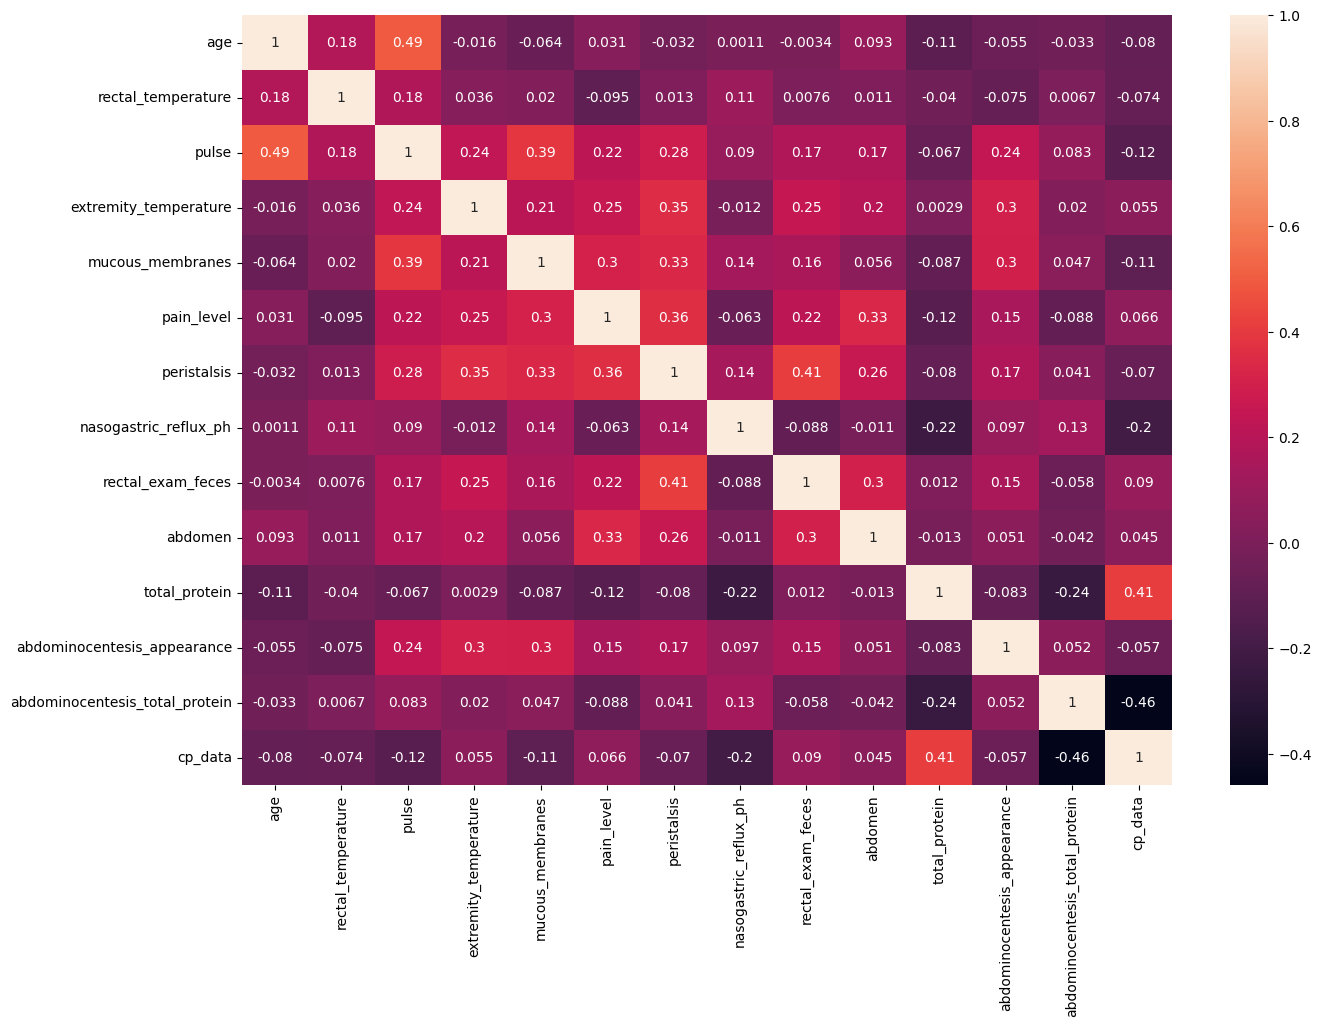

In [238]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

#spliting the dataset



In [239]:
X=df.drop('cp_data',axis=1)
y=df['cp_data']

In [241]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Building model

In [242]:
model=RandomForestClassifier()
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier()

In [243]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [248]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8500


#save the model

In [245]:
import joblib
#save the model'
joblib.dump(model,'best_model.pkl')

['best_model.pkl']

In [246]:
# Load the trained model from the file
loaded_model = joblib.load('best_model.pkl')

#take example data set to predict loaning the model

In [251]:
# Creating a small example data (1 row) with the same features
data = {
    'age': [1],  # Example value: 1 = Adult horse
    'rectal_temperature': [38.5],  # Example value in Celsius
    'pulse': [40],  # Example value in beats per minute
    'extremity_temperature': [2],  # Example value: 2 = Warm
    'mucous_membranes': [1],  # Example value: 1 = normal pink
    'pain_level': [3],  # Example value: 3 = intermittent mild pain
    'peristalsis': [2],  # Example value: 2 = normal
    'nasogastric_reflux_ph': [3.5],  # Example value (pH scale)
    'rectal_exam_feces': [2],  # Example value: 2 = increased
    'abdomen': [3],  # Example value: 3 = firm feces in the large intestine
    'total_protein': [6.8],  # Example value in gms/dL
    'abdominocentesis_appearance': [2],  # Example value: 2 = cloudy
    'abdominocentesis_total_protein': [3.5]  # Example value in gms/dL
}

# Convert the dictionary to a DataFrame
X_new = pd.DataFrame(data)

# Display the new data (to verify)
print(X_new)

   age  rectal_temperature  pulse  extremity_temperature  mucous_membranes  \
0    1                38.5     40                      2                 1   

   pain_level  peristalsis  nasogastric_reflux_ph  rectal_exam_feces  abdomen  \
0           3            2                    3.5                  2        3   

   total_protein  abdominocentesis_appearance  abdominocentesis_total_protein  
0            6.8                            2                             3.5  


In [252]:
# Example prediction
y_pred_new = loaded_model.predict(X_new)

# Print predictions
print(y_pred_new)

[1]


cp_data
           is pathology data present for this case?\
               1 = Yes\
               2 = No\